In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [4]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [5]:
# create a mapping from fruit label value ot fruit name to make results easier to interpret
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
fruits['fruit_subtype'].nunique()

10

In [7]:
fruits['fruit_subtype'].unique()

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

In [8]:
fruits.shape

(59, 7)

<IPython.core.display.Javascript object>


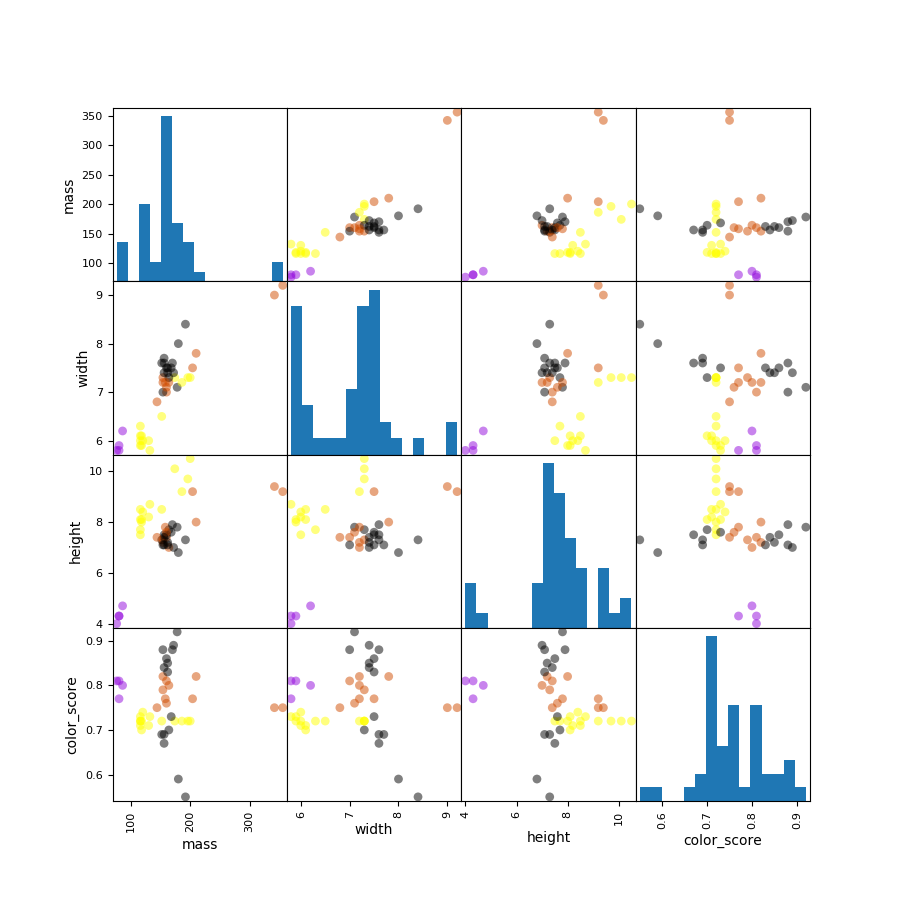

In [10]:
# Split the data into training and test
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# plotting a scatter matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


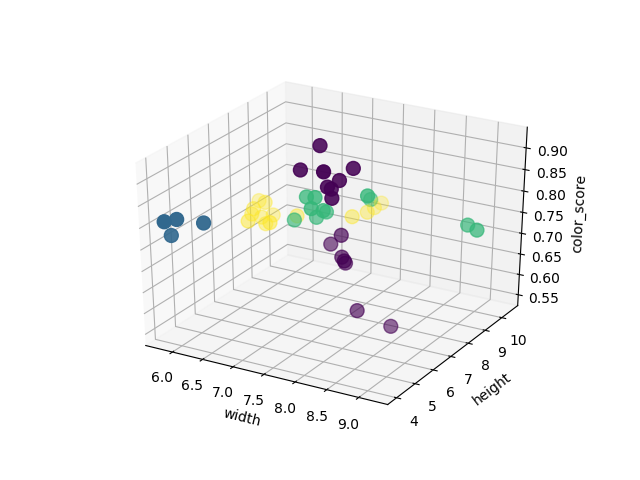

In [13]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [14]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.53333333333333333

In [18]:
# Use the trainined k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with m = 20g, w = 4.3 cm, h = 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
look_up_fruit_name[fruit_prediction[0]]

'mandarin'

In [24]:
look_up_fruit_name[knn.predict([[180, 7.3, 7.5]])[0]]

'apple'

In [25]:
look_up_fruit_name[knn.predict([[100, 6.3, 8.5]])[0]]

'lemon'

<IPython.core.display.Javascript object>


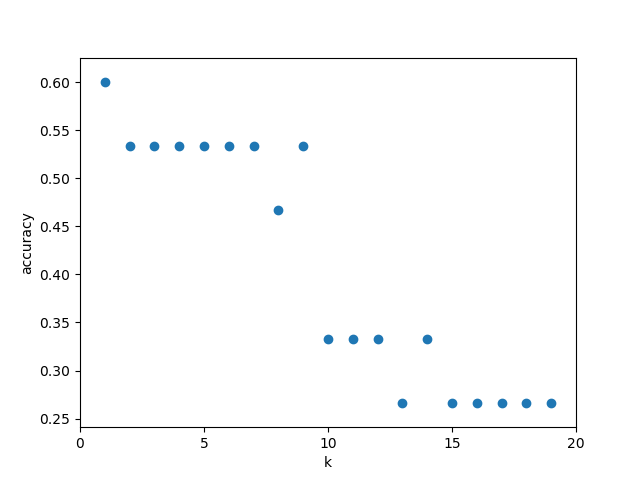

([<matplotlib.axis.XTick at 0xf74ee80>,
 <a list of 5 Text xticklabel objects>)

In [27]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter# How se 
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

<IPython.core.display.Javascript object>


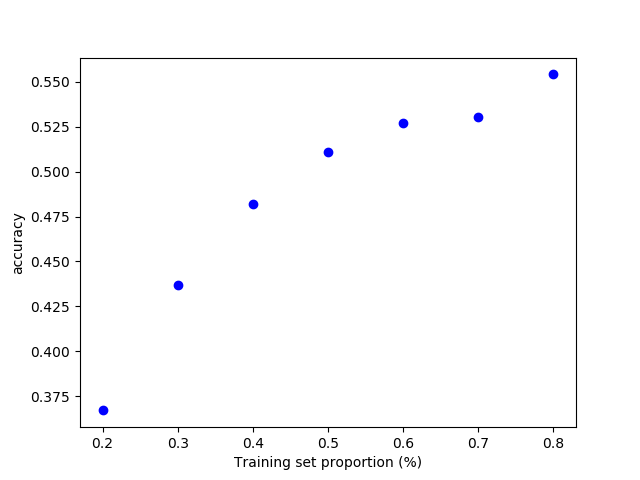

In [29]:
# How sensitive is k-NN classification accuracy to the train/test split proportion
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');